In [1]:
import torch
import math
import torch.optim as optim
from torch.nn import Module, Linear, ReLU, BCELoss, Softmax, Parameter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# class MLP(Module):
#     def __init__(self):
#         super().__init__()
#         self.l1_layer = Linear(3, 5, False)
#         self.l1_activation = ReLU()

#         # Hidden Layer
#         self.l2_layer = Linear(5, 10, False)
#         self.l2_activation = ReLU()

#         # Output Layer
#         self.l3_layer = Linear(10, 2, False)
#         self.l3_activation = Softmax()
                
    # def forward(self, batch_tensors):
    #     y = self.l1_activation(self.l1_layer(batch_tensors))
    #     # print(f"First Layer Activations: {y}")
    #     y = self.l2_activation(self.l2_layer(y))
    #     # print(f"Second Layer Activations: {y}")
    #     y = self.l3_activation(self.l3_layer(y))
    #     # print(f"Third Layer Activations: {y}")
    #     return y

class MLP(Module):
    def __init__(self):
        super().__init__()
        self.l1_layer = Parameter(torch.rand(3, 5))
        self.l1_activation = ReLU()

        self.l2_layer = Parameter(torch.rand(5, 10))
        self.l2_activation = ReLU()

        self.l3_layer = Parameter(torch.rand(10, 2))
        self.l3_activation = Softmax()

    def forward(self, batch_tensors):
        y = batch_tensors @ self.l1_layer
        y = self.l1_activation(y)

        y = y @ self.l2_layer
        y = self.l2_activation(y)

        y = y @ self.l3_layer
        y = self.l3_activation(y)

        return y





/Users/kyle/miniconda3/envs/llm-tta/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kyle/miniconda3/envs/llm-tta/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Text(0, 0.5, 'Loss')

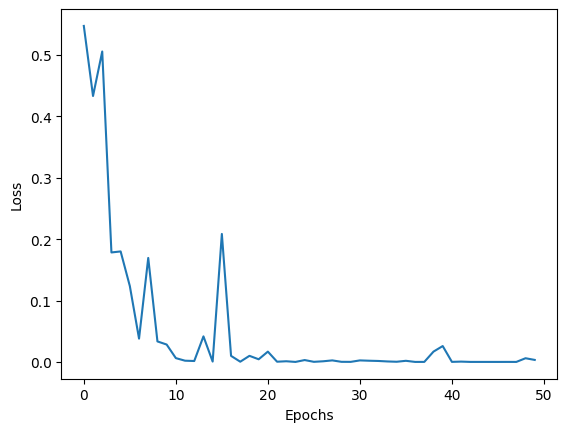

In [3]:
model = MLP()
loss_function = BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)
losses = []

for _ in range(50):
    input = torch.rand(3)
    output = model(input)
    label = torch.Tensor([0, 1])
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())

fig = sns.lineplot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")